<a href="https://colab.research.google.com/github/neel26desai/cmpe255_clustering/blob/main/TimeSeriesClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: Alphabet Stock Price https://finance.yahoo.com/quote/GOOG/history/

For the purpose of using a pretrained clustering model, we will first train the model upto a time t, and then we'll use the pre trained model to cluster on the remaining data

In [2]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('/content/GOOG.csv')

In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
1,2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500
2,2022-11-29,96.000000,96.389999,94.389999,95.440002,95.440002,20220000
3,2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100
4,2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500


In [35]:
df['Date'].min(),df['Date'].max()

('2022-11-25', '2023-11-24')

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [37]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500
2022-11-29,96.000000,96.389999,94.389999,95.440002,95.440002,20220000
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500


In [38]:
df_train = df.loc[:pd.to_datetime('2023-06-01')].copy()

In [39]:
df_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500
2022-11-29,96.000000,96.389999,94.389999,95.440002,95.440002,20220000
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500
...,...,...,...,...,...,...
2023-05-25,125.209999,125.980003,122.900002,124.349998,124.349998,33812700
2023-05-26,124.065002,126.000000,123.290001,125.430000,125.430000,25154700
2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700


In [40]:
df_test = df.loc[pd.to_datetime('2023-06-01'):].copy()

In [41]:
from matplotlib import pyplot as plt

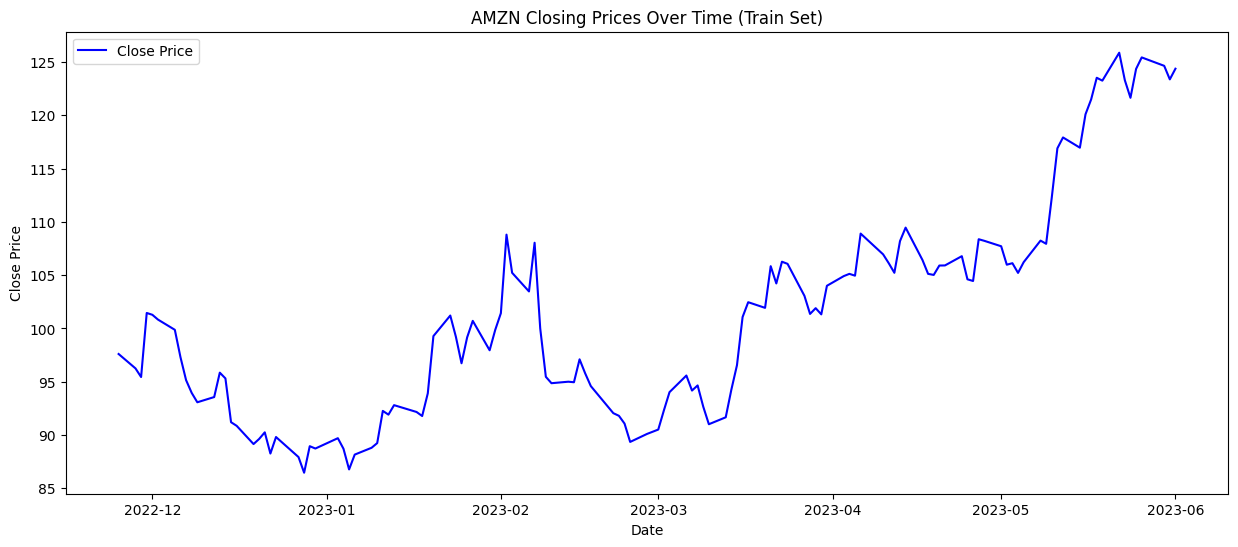

In [28]:
#viewing the time series
# Time series plot of the closing prices
plt.figure(figsize=(15, 6))
plt.plot(df_train['Close'], label='Close Price', color='blue')
plt.title('AMZN Closing Prices Over Time (Train Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


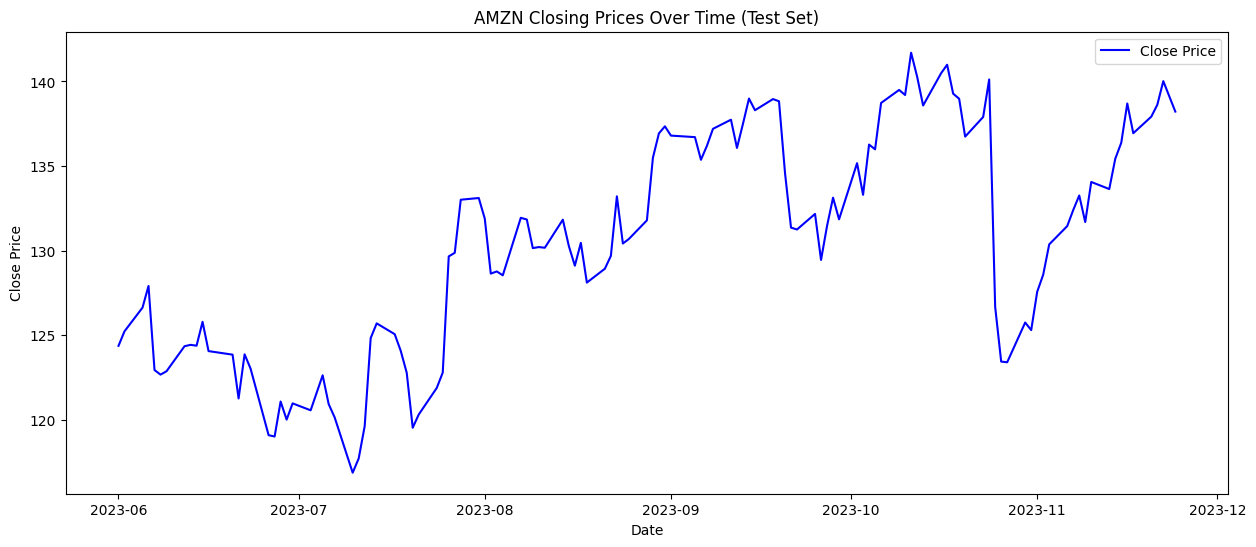

In [29]:
#viewing the time series
# Time series plot of the closing prices
plt.figure(figsize=(15, 6))
plt.plot(df_test['Close'], label='Close Price', color='blue')
plt.title('AMZN Closing Prices Over Time (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
# Assuming monthly seasonality
decomposition = seasonal_decompose(df_train['Close'], model='additive', period=30)
# Extracting the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

# Adding these components back to the original DataFrame
df_train['Trend'] = trend
df_train['Seasonal'] = seasonal

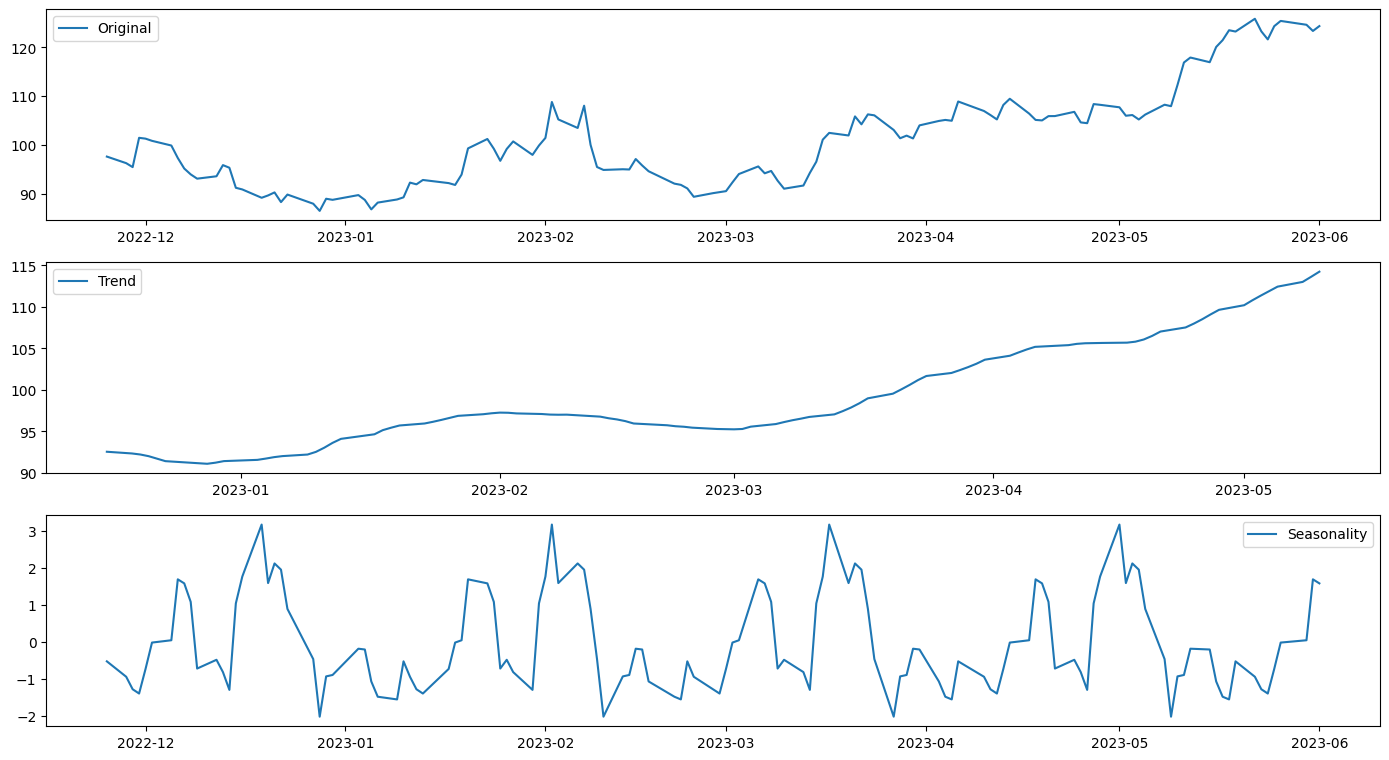

In [43]:
# Plotting the original time series and its components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df_train['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [80]:
# Selecting the features for clustering
X=df_train[['Close','Open','Volume', 'Seasonal']].dropna()


In [66]:
X.isna().sum()

Close       0
Open        0
Volume      0
Seasonal    0
dtype: int64

In [45]:
from sklearn.cluster import KMeans

In [81]:
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Adding the cluster labels to the DataFrame
df_train['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
from sklearn.decomposition import PCA

# Performing PCA for dimensionality reduction
# Reducing to 2 dimensions for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
import seaborn as sns

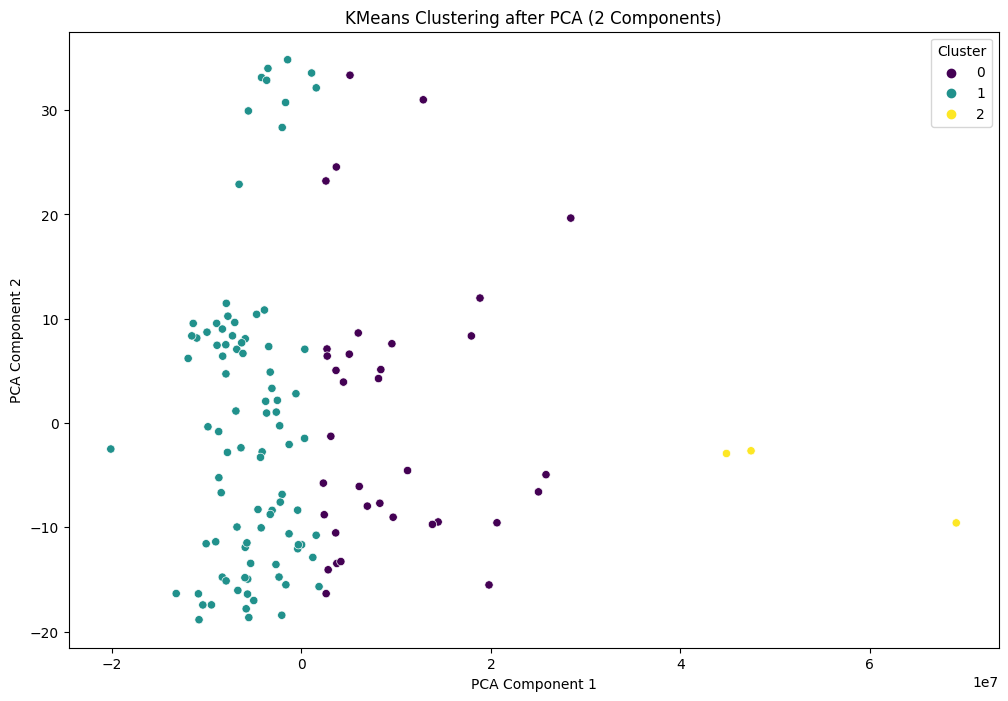

In [72]:
# Adding the PCA components to the DataFrame
df_train['PCA1'] = X_pca[:, 0]
df_train['PCA2'] = X_pca[:, 1]

# Plotting the results after PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_train, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')

plt.title('KMeans Clustering after PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [83]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate cluster quality metrics
silhouette_avg = silhouette_score(X, df_train['Cluster'])
davies_bouldin = davies_bouldin_score(X, df_train['Cluster'])
calinski_harabasz = calinski_harabasz_score(X, df_train['Cluster'])

silhouette_avg, davies_bouldin, calinski_harabasz

(0.5969436565941068, 0.5410112338291067, 245.53430508226677)

Using the trained model for making predictions

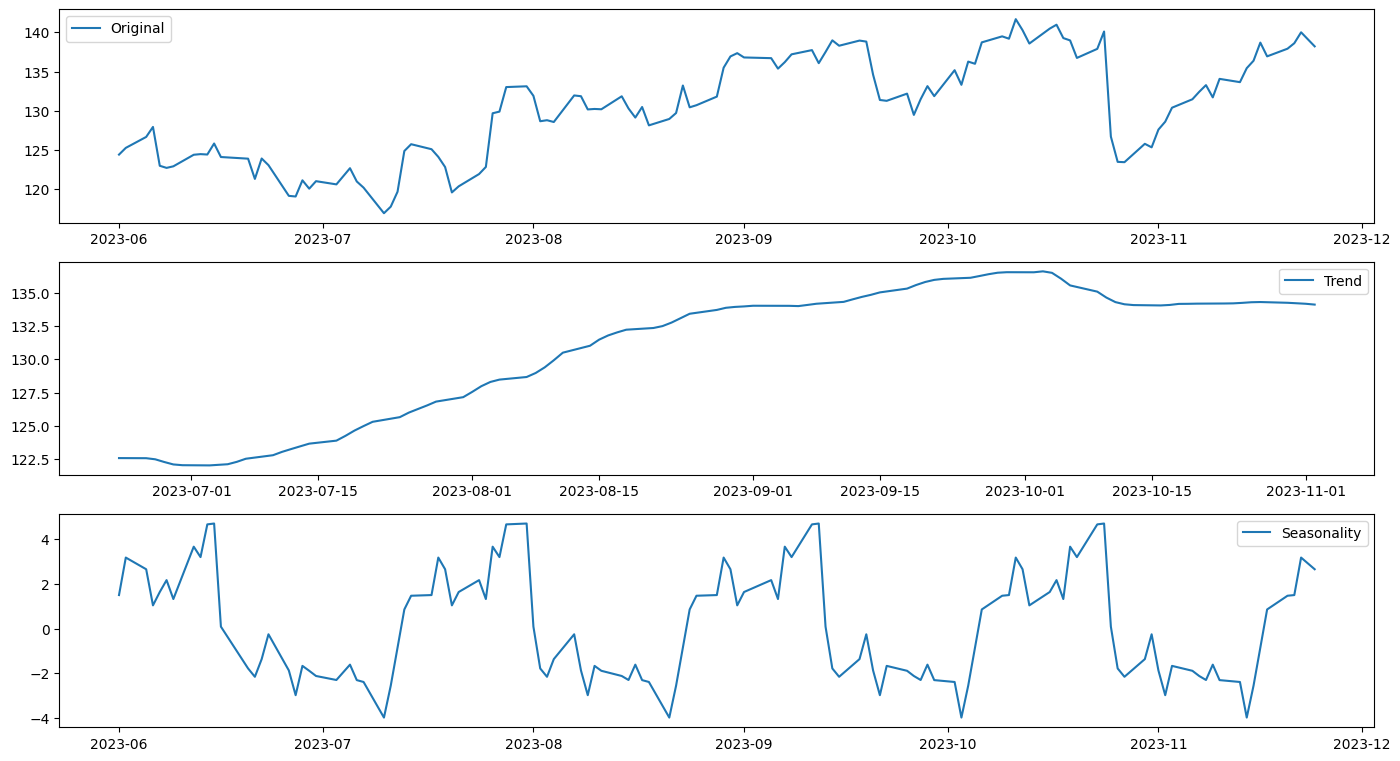

In [73]:
# Assuming monthly seasonality
decomposition = seasonal_decompose(df_test['Close'], model='additive', period=30)
# Extracting the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal
# Adding these components back to the original DataFrame
df_test['Trend'] = trend
df_test['Seasonal'] = seasonal
# Plotting the original time series and its components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df_test['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [74]:
# Selecting the features for clustering
X=df_test[['Close','Open','Volume', 'Seasonal']].dropna()


In [75]:
df_test['Cluster'] = kmeans.predict(X)

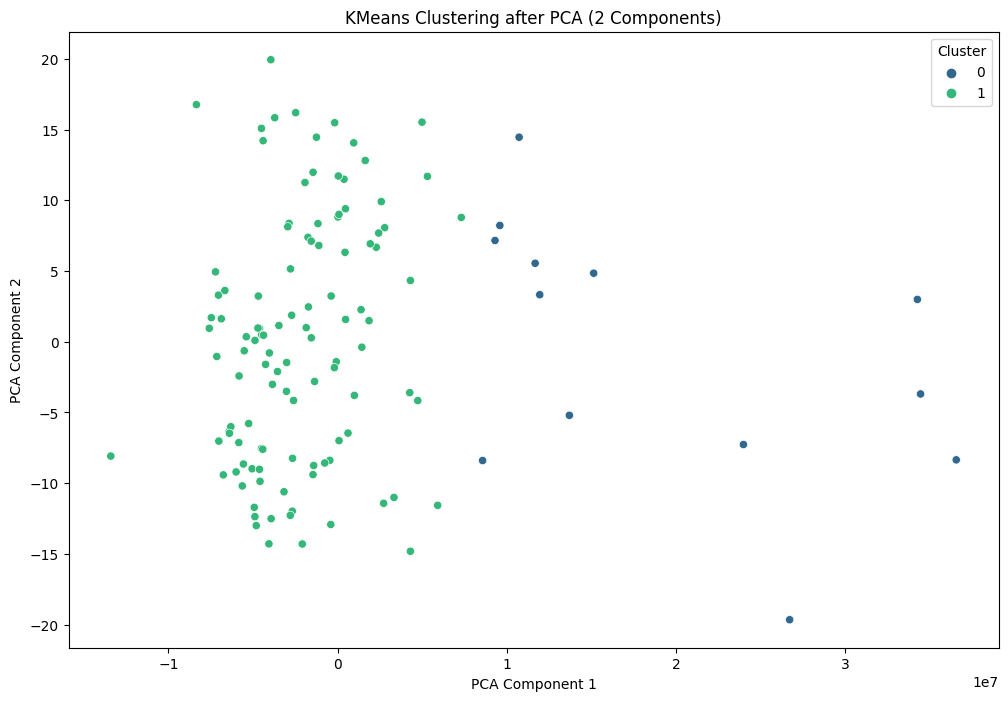

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Adding the PCA components to the DataFrame
df_test['PCA1'] = X_pca[:, 0]
df_test['PCA2'] = X_pca[:, 1]

# Plotting the results after PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_test, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')

plt.title('KMeans Clustering after PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [77]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate cluster quality metrics
silhouette_avg = silhouette_score(X, df_test['Cluster'])
davies_bouldin = davies_bouldin_score(X, df_test['Cluster'])
calinski_harabasz = calinski_harabasz_score(X, df_test['Cluster'])

silhouette_avg, davies_bouldin, calinski_harabasz

(0.7498864006819765, 0.5807115039116721, 227.0293533099652)